## Assignment 1, 04/11/2018
### Prepared by Duygu Sonmez Tabak

In this assignment, we will design a simple sensor that can distinguish between red wine and white wine. Our sensor must correctly distinguish between red and white wine for at least 95% of the samples in a set of 6497 test samples of red and white wine.

### Load & Inspect the Dataset

First, we will load the dataset. 

In [432]:
# Import the libraries
import pandas as pd
import numpy as np

In [433]:
# Load in the data with 'read_csv()'
wine = pd.read_csv("/Users/duygusonmez/Desktop/Assignment1/RedWhiteWine.csv",
                     header=None)

Let's take a look at the dataset.

In [434]:
wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6498,6498,6498,6498,6498,6498,6498,6498,6498,6498,6498,6498,6498
unique,107,188,90,317,215,136,277,999,109,112,112,8,3
top,6.8,0.28,0.3,2,0.044,29,111,0.9972,3.16,0.5,9.5,6,0
freq,354,286,337,235,206,183,72,69,200,276,367,2836,4898


In [435]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,1
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,1


### Cleaning the Dataset

Since the dataset has no missing values and categorical attributes, we don't need to deal with them in this particular case.

In [436]:
# Assigning column names
num_features = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", 
                "density", "pH", "sulphates", "alcohol", "quality", "Class"]

wine.columns = num_features

In [437]:
wine.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Class
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1


In [438]:
# Dropping the first row
wine.drop(wine.index[0], inplace=True)

In [439]:
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Class
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1


We need to convert each attribute to numeric to have them scaled. 

In [440]:
#Converting each column to numeric 
for each in num_features:
    wine[each] = pd.to_numeric(wine[each])

### Scaling the Dataset

We need to scale numeric attributes to perform classification with higher accuracy.

In [441]:
scaled_fatures = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", 
                "density", "pH", "sulphates", "alcohol", "quality"]

In [442]:
for each in scaled_fatures:
    mean, std = wine[each].mean(), wine[each].std()
    scaled_features[each] = [mean, std]
    wine.loc[:, each] = (wine[each] - mean)/std

In [443]:
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Class
1,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.81295,0.193082,-0.915394,-0.937157,1


We will remove the quality attribute, which we will not need for this assignment.

In [444]:
wine.drop(['quality'], axis = 1, inplace = True)

In [445]:
wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Class
1,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.81295,0.193082,-0.915394,1


### Building the Naive Bayes model

We will divide the dataset into training and test datasets.

In [446]:
msk = np.random.rand(wine.shape[0]) <= 0.8

In [584]:
wine_train = wine.iloc[msk, 0:11]
wine_train_target = wine.iloc[msk, 11]
wine_test = wine.iloc[~msk, 0:11]
wine_test_target = wine.iloc[~msk, 11]

In [608]:
wine_train.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.81295,0.193082,-0.915394


In [609]:
len(wine_train), len(wine_test)

(5180, 1317)

So, 20% of the data went to the test bucket and 80% of the data went to the training bucket. 

Now, we will create a Naive Bayes model for our classification task.

In [ ]:
# Import the libraries
import sklearn.naive_bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics
from matplotlib import pyplot as plt

Here we will create a function to train our model and to calculate it's accuracy.
* Classification targets should be represented as integers or as strings. That's why it's converted to string in the code below. 

In [518]:
#Build the model
class GNBModel:
    modelName = ""
    gnb_model = None
    y_pred = None
    
    def __init__(self, modelName):
        self.modelName = modelName
        
    def getModelName(self):
        return self.modelName
    
    def train(self, trainData, trainDataTarget):
        gnb = GaussianNB()
        self.gnb_model = gnb.fit(trainData.astype(str), trainDataTarget.astype(str))
        
    def findAccuracyUsingTestData(self, testData, testDataTarget):
        self.y_pred = self.gnb_model.predict(testData)
        misclassified_points = (testDataTarget.astype(str) != self.y_pred).sum()
        print("ACCURACY FOR " + self.modelName)
        print("Number of mislabeled points out of a total %d points : %d"%(testData.shape[0], misclassified_points))
        print("Accuracy = %.2f"%(round((testData.shape[0] - float(misclassified_points))/testData.shape[0]*100,2)))

    def determineAUC(self, testDataTarget):
        fpr, tpr,_ = metrics.roc_curve(testDataTarget.astype(float), self.y_pred.astype(float))
        print(self.modelName + " AUC: " + str(metrics.auc(fpr, tpr)))
        plt.plot(fpr, tpr)
        plt.show()

Now we train our model using the training data. After training the model we will calculate the accuracy of the trained model by running predictions on test data and comparing results.

In [585]:
#Run for all columns
allColumnsModel = GNBModel("Model Using All Attributes")
allColumnsModel.train(wine_train, wine_train_target)
allColumnsModel.findAccuracyUsingTestData(wine_test, wine_test_target)

ACCURACY FOR Model Using All Attributes
Number of mislabeled points out of a total 1317 points : 33
Accuracy = 97.49


We will also calculate and plot the AUC for our classifier. 

Model Using All Attributes AUC: 0.971922707377


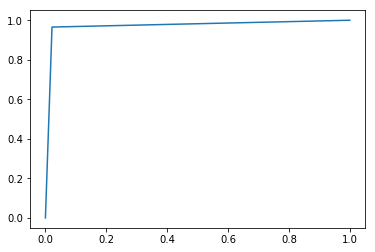

In [520]:
allColumnsModel.determineAUC(wine_test_target)

Now, we want to use a subset of attributes to achive a better accuracy. We will use a Random Forest classifier to determine the most important attributes that should be used in our next model. 

In [456]:
# Import 'RandomForestClassifier'
from sklearn.ensemble import RandomForestClassifier

In [457]:
# Build the model
names = wine.columns.values
rfc = RandomForestClassifier()
rfc.fit(wine_train.astype(str), wine_train_target.astype(str))

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.4175, 'chlorides'), (0.2292, 'total_sulfur_dioxide'), (0.0669, 'volatile_acidity'), (0.0665, 'sulphates'), (0.0416, 'fixed_acidity'), (0.0399, 'free_sulfur_dioxide'), (0.0399, 'density'), (0.0369, 'residual_sugar'), (0.0344, 'citric_acid'), (0.0195, 'pH'), (0.0076, 'alcohol')]


We determined the importance of each attribute. We can also plot the attributes based on their importance. 

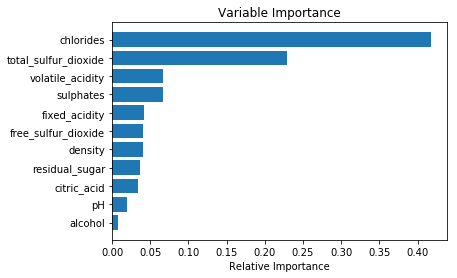

In [533]:
# Isolate feature importances 
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

We will build a new Naive Bayes model with a subset of attributes as opposed to using all of them. We will start with including the four most important attributes at first. 

In [586]:
wine_train_subset = wine.loc[msk, ['chlorides', 'total_sulfur_dioxide', 'volatile_acidity',
                             'sulphates']]
wine_train_target_subset = wine.iloc[msk, 11]
wine_test_subset = wine.loc[~msk, ['chlorides', 'total_sulfur_dioxide', 'volatile_acidity',
                             'sulphates']]
wine_test_target_subset = wine.iloc[~msk, 11]

In [563]:
wine_train_subset.head(1)

,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
1,-1.100055,-1.446247,1.034913,1.81295,0.193082,-0.915394


Now we will create a Naive Bayes classifier using a subset of attributes as opposed to using all of the attributes.

In [598]:
#Run for a subset of columns
fourColumnsModel = GNBModel("Model Using a Subset of Attributes")
fourColumnsModel.train(wine_train_subset, wine_train_target_subset)
fourColumnsModel.findAccuracyUsingTestData(wine_test_subset, wine_test_target_subset)

ACCURACY FOR Model Using a Subset of Attributes
Number of mislabeled points out of a total 1317 points : 47
Accuracy = 96.43


When we use a subset of attributes as opposed to all of the attributes, the accuracy will drop slightly.

Model Using a Subset of Attributes AUC: 0.96101562222


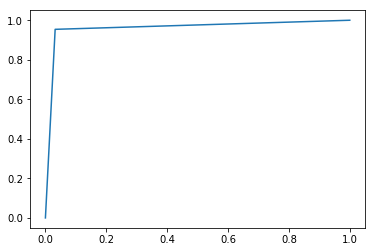

In [588]:
subColumnsModel.determineAUC(wine_test_target_subset)

Let's create a new model with using only three attributes to see how it is going to impact the accuracy of our classifier.

In [596]:
wine_train_subset2 = wine.loc[msk, ['chlorides', 'total_sulfur_dioxide', 'volatile_acidity']]
wine_train_target_subset2 = wine.iloc[msk, 11]
wine_test_subset2 = wine.loc[~msk, ['chlorides', 'total_sulfur_dioxide', 'volatile_acidity']]
wine_test_target_subset2 = wine.iloc[~msk, 11]

In [597]:
#Run for a subset of columns, with three attributes
threeColumnsModel = GNBModel("Model Using a Smaller Subset of Attributes")
threeColumnsModel.train(wine_train_subset2, wine_train_target_subset2)
threeColumnsModel.findAccuracyUsingTestData(wine_test_subset2, wine_test_target_subset2)

ACCURACY FOR Model Using a Smaller Subset of Attributes
Number of mislabeled points out of a total 1317 points : 58
Accuracy = 95.60


We see that when we use two attributes in our model instead of three attributes, we get slighlty less accuracy. 

We will create a new model with using only two attributes to determine the minimum number of attributes that we can use.

In [603]:
wine_train_subset3 = wine.loc[msk, ['chlorides', 'total_sulfur_dioxide']]
wine_train_target_subset3 = wine.iloc[msk, 11]
wine_test_subset3 = wine.loc[~msk, ['chlorides', 'total_sulfur_dioxide']]
wine_test_target_subset3 = wine.iloc[~msk, 11]

In [604]:
#Run for a subset of columns, with two attributes
twoColumnsModel = GNBModel("Model Using only two attributes")
twoColumnsModel.train(wine_train_subset3, wine_train_target_subset3)
twoColumnsModel.findAccuracyUsingTestData(wine_test_subset3, wine_test_target_subset3)

ACCURACY FOR Model Using only two attributes
Number of mislabeled points out of a total 1317 points : 77
Accuracy = 94.15


Let's try building our model based on only one attribute and see what happens.

In [605]:
wine_train_subset4 = wine.loc[msk, ['chlorides']]
wine_train_target_subset4 = wine.iloc[msk, 11]
wine_test_subset4 = wine.loc[~msk, ['chlorides']]
wine_test_target_subset4 = wine.iloc[~msk, 11]

In [606]:
#Run for a subset of columns, with one attribute
oneColumnsModel = GNBModel("Model Using only one attribute")
oneColumnsModel.train(wine_train_subset4, wine_train_target_subset4)
oneColumnsModel.findAccuracyUsingTestData(wine_test_subset4, wine_test_target_subset4)

ACCURACY FOR Model Using only one attribute
Number of mislabeled points out of a total 1317 points : 279
Accuracy = 78.82


### Summary

1. Classification results (using all attributes)
  * Accuracy: 97.49  
  * AUC: 0.971922707377 
   
2. Classification results (using the most important four attributes)
  * Accuracy: 96.43 
  * AUC: 0.96101562222
  
3. Classification results (using the most important three attributes)
  * Accuracy: 95.60 
 
4. Classification results (using the most important two attributes)
  * Accuracy: 94.15
  
5. Classification results (using the most important attribute)
  * Accuracy: 78.82 

* The best AUC that we can achieve is  0.971922707377 and we can achieve it when we build our model based on all of the attributes. 
* We will need three attributes at minimum to achieve accuracy higher than 95%. The less number of attributes we use, the less accurate our model gets. 